# Pryngles Tutorials: Developers
## Part 2 - Module Sampler

This notebook illustrate in detail the interface of the `Pryngles` package. It is especially intended for developers.

Authors:
- Jorge I. Zuluaga, [jorge.zuluaga@udea.edu.co](mailto:jorge.zuluaga@udea.edu.co)

Warnings:
- This file was prepared using version 0.7.3.1 of `Pryngles`.
- It is still working under version 0.9.0.
- Matplotlib commands run in version 3.5.2.

<center><font color='red' size='8'><i>This tutorial is under construction.</i></font></center>

## Preparation

Before running this tutorial you need to install `Pryngles`:

In [6]:
#!python -m pip install -qU pryngles
#!pip show pryngles

If you are running this tutrial in `Google Colab` please run the following lines:

In [7]:
"""
import matplotlib.pyplot as plt
RESOLUTION = 150
%matplotlib inline
plt.rcParams['figure.dpi'] = RESOLUTION
# Sometimes you need to run twice this magic to be sure the backend is loaded
%matplotlib inline
#""";

## Import useful packages

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Although it is not a good practice to import everything of a package, for this tutorial and to avoid excesively large names we will import everything from Pryngles:

In [2]:
from pryngles import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Core modules

### Sampler (`sampler`)

Spangler is the class which generate the positions of the spangles which cover the surface of a ring or a planet.

Methods of the `Sampler` class:

In [3]:
Misc.get_methods(Sampler)

['_calc_distances',
 '_cut_hole',
 '_get_min_distance',
 '_seed_sampler',
 'gen_circle',
 'gen_ring',
 'gen_sphere',
 'load_from',
 'plot',
 'purge_sample',
 'save_to',
 'update_normals']

To create a Sampler use:

In [4]:
sp=Sampler()

This will create a default Spangler with N = 1000 spangles (see documentation to verify) or check the attributes:

In [5]:
sp.N

1000

Now you can generate spangle positions in differente geometries.  A set of cartesian, polar or spherical positions is called a *Sample*.

<IPython.core.display.Javascript object>


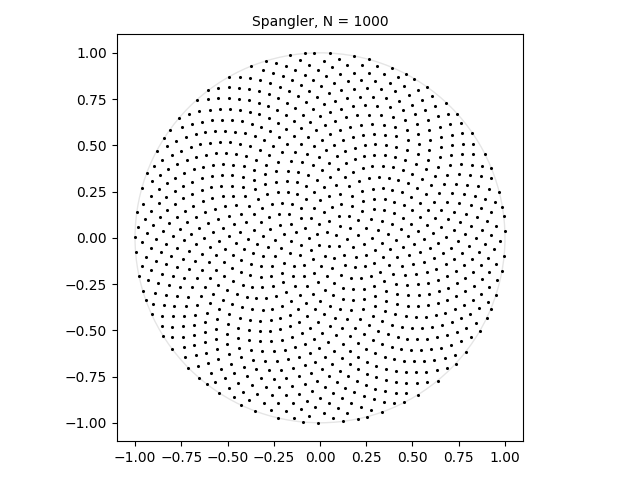

In [6]:
#Generate sample in a unitary circle
sp.gen_circle()

#Plot the sample
sp.plot()

sp.ax.set_title(f"Spangler, N = {sp.N}",fontsize=10)
sp.fig.tight_layout()

You may get information about the points with the attributes `ss` (position in cartesian coordinates) and `pp` (positions in polar or spherical coordinates) and `ns` (normal vector to points over the surface of the sample area):

In [7]:
sp.ss, sp.pp, sp.ns

(array([[-0.01367277,  0.01815446,  0.        ],
        [-0.00377809, -0.03918307,  0.        ],
        [ 0.03776627,  0.03400519,  0.        ],
        ...,
        [ 0.46599335,  0.88478822,  0.        ],
        [-0.94127485, -0.33764132,  0.        ],
        [ 0.92214021, -0.38685583,  0.        ]]),
 array([[0.02272727, 2.21630135, 0.        ],
        [0.03936479, 4.61626458, 0.        ],
        [0.05081973, 0.7330425 , 0.        ],
        ...,
        [1.        , 1.08603935, 0.        ],
        [1.        , 3.48600258, 0.        ],
        [1.        , 5.88596581, 0.        ]]),
 array([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]]))

Coordinates in polar are given as $(r,\theta,\phi)$ with angular coordinate in radians.  Points are not sorted in any way.

Several interesting statistical measures are provided internally:

In [8]:
print(sp.dmin,sp.dmax,sp.dmed,sp.dran,sp.dstar)

0.04331330506982104 0.06459591610469687 0.05424599552140359 0.021282611034875824 1.7154089979092852


`sp.dmin,sp.dmax,sp.dmed` for instance is the minimum, maximum and average distance between the points in the sample.  `sp.dran` is the difference between the maximum and minimum.  `sp.dstar` is a measure of the distance between the points which is typically between 1.7 and 3.4 (see http://extremelearning.com.au/evenly-distributing-points-on-a-sphere)

There is another property: `deff`.  This is the diameter that has to have a spangle in such a way that all spangles have the same total area of the region covered by the sample.  You may understande `deff` if show not only the position of the spangles but also the spangles itself:

<IPython.core.display.Javascript object>


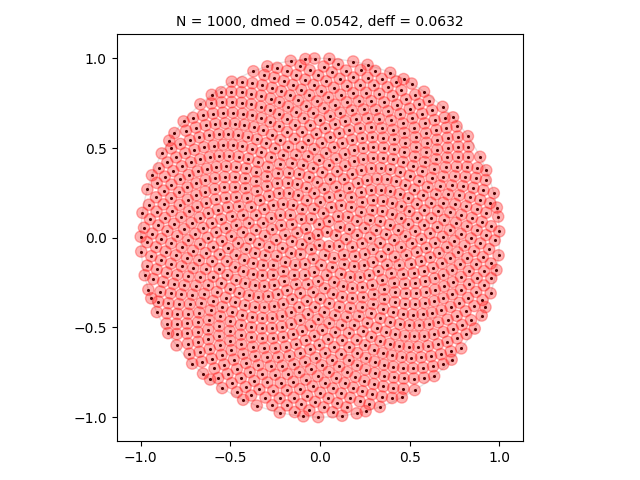

In [9]:
sp.plot(spangled=dict(color='r'))
sp.ax.set_title(f"N = {sp.N}, dmed = {sp.dmed:.4f}, deff = {sp.deff:.4f}",fontsize=10)
sp.fig.tight_layout()

Now you may check that the effective diameter of the spangles are a little bit larger than the average distance.

If you want that the spangle position not be different each time use:

In [10]:
sp=Sampler(seed=1)

Other Spangler's methods are:

<IPython.core.display.Javascript object>


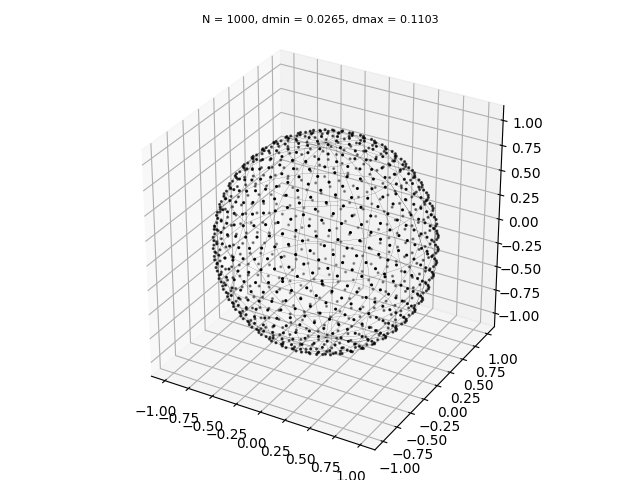

In [11]:
sp.seed=1
sp.N=1000
sp.gen_sphere()
sp.plot()

sp.ax.set_title(f"N = {sp.N}, dmin = {sp.dmin:.4f}, dmax = {sp.dmax:.4f}",fontsize=8);
sp.fig.tight_layout()

And plot the spangles:

<IPython.core.display.Javascript object>


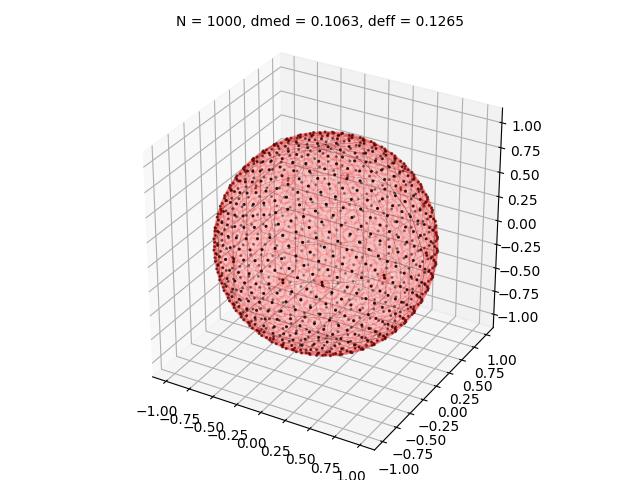

In [12]:
sp.plot(spangled=dict(color='r',alpha=0.1))
sp.ax.set_title(f"N = {sp.N}, dmed = {sp.dmed:.4f}, deff = {sp.deff:.4f}",fontsize=10)
sp.fig.tight_layout()

You may see that there are some superpositions between spangles.  This is because, when the points are generated in the surface of a sphere it could be one or two points really close.  Since the idea is that every point be more or less at the same distance, one way to improve the situation is to purge the sample:

In [13]:
sp.purge_sample()
sp.N,sp.dmin,sp.dmax

(987, 0.09777409588068323, 0.11025145618170583)

Plotting again:

<IPython.core.display.Javascript object>


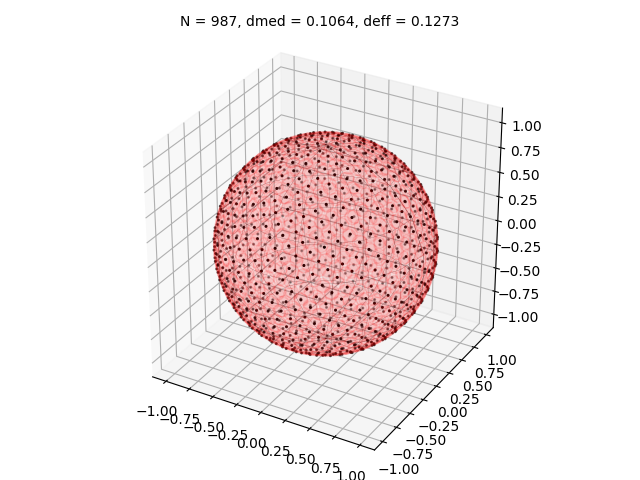

In [14]:
sp.plot(spangled=dict(color='r',alpha=0.1))
sp.ax.set_title(f"N = {sp.N}, dmed = {sp.dmed:.4f}, deff = {sp.deff:.4f}",fontsize=10)
sp.fig.tight_layout()

As you can see the number of points have been reduced to less than the original number selected, 1000 due to the purging process, and the distance between all points is almost the same.

You can also obtain a Sampler from presets:

Number of final points 2584, number of points in preset: 2600


<IPython.core.display.Javascript object>


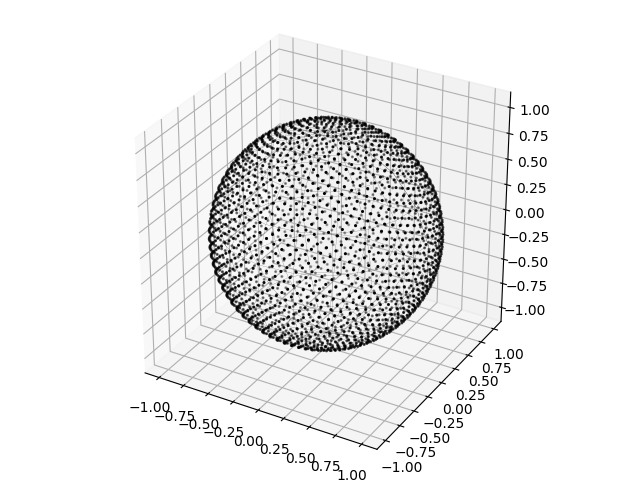

In [15]:
sp=Sampler(preset=("sphere",dict()),N=2738)
print(f"Number of final points {sp.N}, number of points in preset: {sp.Npreset}")
sp.plot()

As you can see the time required to load the data from a preset is much lower.  Pryngles search for the preset closer to the number (2378). The algorithm choose 2600 and then after the purge the value is 2548.

Another geometrical figure is a ring

<IPython.core.display.Javascript object>


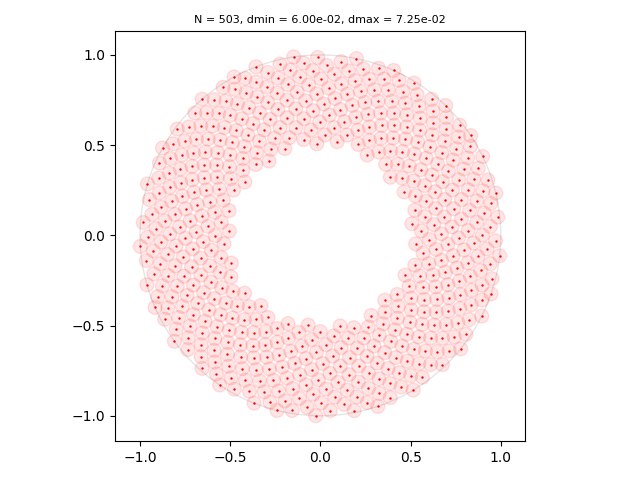

In [16]:
sp.N=500
sp.gen_ring(0.5,boundary=1)
sp.plot(c='r',s=0.5,spangled=dict(color='r',alpha=0.1)) # Yo may use the options of the scatter function
sp.ax.set_title(f"N = {sp.N}, dmin = {sp.dmin:.2e}, dmax = {sp.dmax:.2e}",fontsize=8);
sp.fig.tight_layout()

And again you might load it from a preset:

<IPython.core.display.Javascript object>


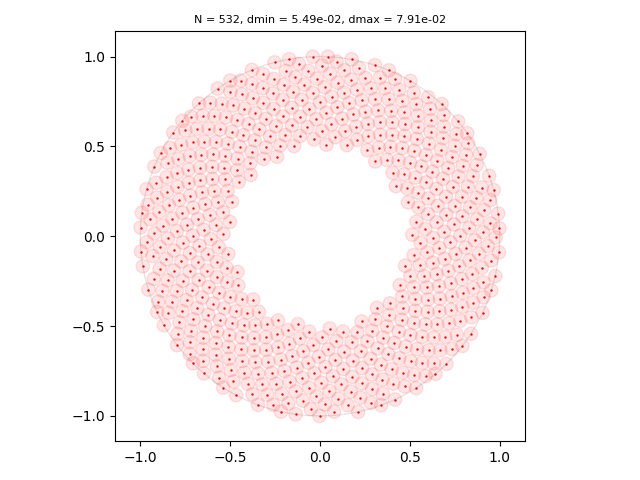

In [17]:
sp=Sampler(N=500,preset=("ring",dict(ri=0.5)))
sp.plot(c='r',s=0.5,spangled=dict(color='r',alpha=0.1)) # Yo may use the options of the scatter function
sp.ax.set_title(f"N = {sp.N}, dmin = {sp.dmin:.2e}, dmax = {sp.dmax:.2e}",fontsize=8);
sp.fig.tight_layout()

The generation of points have an option to fill the border:

<IPython.core.display.Javascript object>


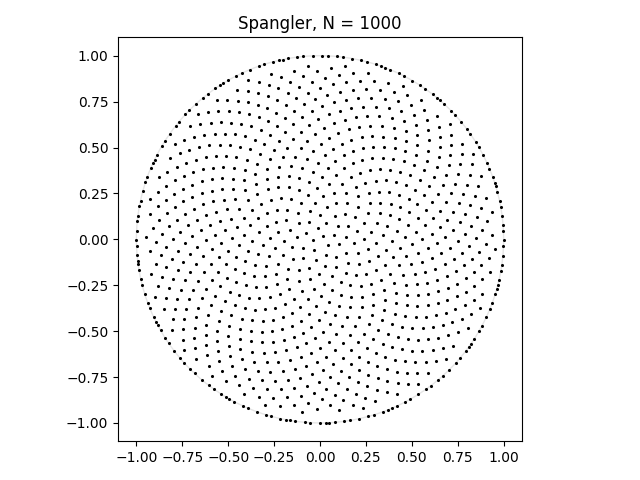

In [18]:
#Generate sample in a unitary circle
sp.N=1000
sp.gen_circle(boundary=5) #Make a heavier boundary

#Plot the sample
sp.plot()

sp.ax.set_title(f"Spangler, N = {sp.N}")
sp.fig.tight_layout()

--- 
*The authors*, Last update: october, 2022.